# Indie Vs Triple A

## Introduction

The gaming industry has seen a shift in recent years, that being the rise of independent developers. In the early 2000s, the idea that indie games could be anything close to good was a pipe-dream. The general consensus was that only triple A studios had the expertise and budget to make a "real" video game. However, in 2008, the indie game **Braid** was released, revealing to the world that there is potential for the independent creator to make an indie game worthy of critical acclaim. Since then, there has been a significant shift in player sentiment as indie games have legitimized their place in their genre and a growing disdain toward triple A studios due to the over-commercialization of games. Thus, my project aims to study the shifts in player sentiment over the past few years to see if these trends are backed by data from the popular game distribution platform Steam. This project aims to answer the following questions:

- Has views on indie games become more positive over time?
- Has views on triple A games become more negative over time?
- **Have indie games surpassed triple A games in player sentiment?**

Note:
- The use of the word "popularity" is solely used to describe the number of players who engage with a game, and is not necessarily tied to sentiment. A game described as popular in this project can still have a bad sentiment if its a bad game that a lot of people played.
- Whenever the project mentions saving a file, this file in question *is not* included in the repository. Saving refers to the fact that when you run the project on your local machine, it will generated a saved data file so that you (the user) don't have to run any processing steps twice. This does mean however that if you wish to run the code yourself, you *will* have to all run preprocessing steps at least once, which will take a significant amount of time.

### Preprocessing
The data I'll be using is comprised of two datasets, the [100 Million+ Steam Reviews](https://www.kaggle.com/datasets/kieranpoc/steam-reviews) dataset by KieranPO'C and the [Steam Games Dataset](https://www.kaggle.com/datasets/fronkongames/steam-games-dataset) by Martin Bustos. Due to the sheer size of these two datasets (thus making them unavailable in this Github repo) and the inability to direct download the files (Kaggle has download restrictions), you will need a Kaggle account to download the datasets yourself if you wish to run this code on your own machine. Insert the games.json file from the *Steam Games Dataset* and the all_reviews.csv file from the *100 Million+ Steam Reviews* dataset into the data folder of this project, then the following code will be able to run.

**Warning:** Due to the sheer size of the datasets the code will take *a while* to run depending on your computer's specs. Running the preprocessing steps will take a significant amount of computation power. If you are using an online service be cognizant that **running this may rack up costs very quickly**. It is highly recommended to run this locally. The average run time of the preprocessing steps on my machine was around 10-15 minutes (the combined datasets are around 41GB in size). Once that step is over everything else is relatively quick, so only run the preprocessing step once.

In [1]:
# ============
# Pre-processing code. Reads the two datasets, then joins them into one.
# ============

import pandas as pd
from pathlib import Path

my_file = Path("Data/data.pkl")
if my_file.is_file():
    dataset = pd.read_pickle("Data/data.pkl")
else:
    # Steam Games Dataset
    game_info_dataset = pd.read_json("data/games.json")
    game_info_dataset = game_info_dataset.transpose()
    # 100 Million+ Steam Reviews
    game_review_dataset = pd.read_csv("Data/all_reviews.csv")
    
    dataset = pd.merge(game_info_dataset, game_review_dataset, left_on='name', right_on='game') # INNER JOIN between databases based on game name
    
    # Dropping all irrelevant attributes
    dataset = dataset.drop(
        ["app_name", "median_playtime_forever", "median_playtime_2weeks", "average_playtime_2weeks", 
         "header_image", "peak_ccu", "app_id", "dlc_count", "reviews", "support_url", "support_email", 
         "website", "windows", "mac", "linux", "metacritic_score", "metacritic_url", "achievements",
         "recommendations", "notes", "supported_languages", "full_audio_languages", "packages", "developers",
         "publishers", "categories", "screenshots", "movies", "user_score", "score_rank", "appid", "author_steamid", 
         "author_num_games_owned", "author_num_reviews", "author_playtime_forever", "author_playtime_last_two_weeks", 
         "author_playtime_at_review", "author_last_played", "votes_up", "votes_funny", "weighted_vote_score", "comment_count",
         "steam_purchase", "received_for_free", "written_during_early_access", "hidden_in_steam_china", "steam_china_location",
         "recommendationid", "timestamp_updated"
        ]
        , axis=1, errors='ignore')
    # Reformatting release date into a workable format
    dataset["release_date"] = pd.to_datetime(dataset["release_date"], format='mixed')
    dataset['release_year'] = dataset['release_date'].dt.year
    dataset['release_month'] = dataset['release_date'].dt.month
    dataset.to_pickle("Data/data.pkl")

# Seperation of dataset into Indie games and Triple A games
indie_dataset = dataset[dataset.genres.map(lambda x : "Indie" in x) | dataset.tags.map(lambda x : "Indie" in dict(x).keys())]
nonindie_dataset = dataset[dataset.genres.map(lambda x : "Indie" not in x) & dataset.tags.map(lambda x : "Indie" not in dict(x).keys())]


In [287]:
indie_dataset.head()

,name,release_date,required_age,price,detailed_description,about_the_game,short_description,genres,positive,negative,estimated_owners,average_playtime_forever,tags,game,language,review,timestamp_created,voted_up,release_year,release_month
0,Galactic Bowling,2008-10-21,0,19.99,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,"[Casual, Indie, Sports]",6,11,0 - 20000,0,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow...",Galactic Bowling,english,Galactic Bowling (aka Alien Monster Bowling Le...,1673193813,1,2008,10
1,Galactic Bowling,2008-10-21,0,19.99,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,"[Casual, Indie, Sports]",6,11,0 - 20000,0,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow...",Galactic Bowling,english,I bought this game despite all its flaws to pl...,1643722668,0,2008,10
2,Galactic Bowling,2008-10-21,0,19.99,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,"[Casual, Indie, Sports]",6,11,0 - 20000,0,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow...",Galactic Bowling,english,Fun Game,1499517402,1,2008,10
3,Galactic Bowling,2008-10-21,0,19.99,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,"[Casual, Indie, Sports]",6,11,0 - 20000,0,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow...",Galactic Bowling,german,Endlich mal wieder ein Bowling Spiel Abwechslu...,1469980241,1,2008,10
4,Galactic Bowling,2008-10-21,0,19.99,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,"[Casual, Indie, Sports]",6,11,0 - 20000,0,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow...",Galactic Bowling,english,"Menu screen works fine. The game itself, howev...",1451162716,0,2008,10


In [288]:
nonindie_dataset.head()

,name,release_date,required_age,price,detailed_description,about_the_game,short_description,genres,positive,negative,estimated_owners,average_playtime_forever,tags,game,language,review,timestamp_created,voted_up,release_year,release_month
141,Wartune Reborn,2021-02-26,0,0.0,Feel tired of auto-fight? Feel tired of boring...,Feel tired of auto-fight? Feel tired of boring...,'Wartune Reborn' epic magic TBS game was devel...,"[Adventure, Casual, Free to Play, Massively Mu...",87,49,50000 - 100000,0,"{'Turn-Based Combat': 292, 'Massively Multipla...",Wartune Reborn,english,Fun game but with a bit of pay to win,1698161278,1,2021,2
142,Wartune Reborn,2021-02-26,0,0.0,Feel tired of auto-fight? Feel tired of boring...,Feel tired of auto-fight? Feel tired of boring...,'Wartune Reborn' epic magic TBS game was devel...,"[Adventure, Casual, Free to Play, Massively Mu...",87,49,50000 - 100000,0,"{'Turn-Based Combat': 292, 'Massively Multipla...",Wartune Reborn,spanish,Excelentes recuerdos de cuando lo jugaba en fa...,1698100567,1,2021,2
143,Wartune Reborn,2021-02-26,0,0.0,Feel tired of auto-fight? Feel tired of boring...,Feel tired of auto-fight? Feel tired of boring...,'Wartune Reborn' epic magic TBS game was devel...,"[Adventure, Casual, Free to Play, Massively Mu...",87,49,50000 - 100000,0,"{'Turn-Based Combat': 292, 'Massively Multipla...",Wartune Reborn,english,"Is antistres, and the best game of all!",1697979320,1,2021,2
144,Wartune Reborn,2021-02-26,0,0.0,Feel tired of auto-fight? Feel tired of boring...,Feel tired of auto-fight? Feel tired of boring...,'Wartune Reborn' epic magic TBS game was devel...,"[Adventure, Casual, Free to Play, Massively Mu...",87,49,50000 - 100000,0,"{'Turn-Based Combat': 292, 'Massively Multipla...",Wartune Reborn,turkish,"Loc'un ilk çıkmış hali gibi, ama yenilikler ge...",1697575093,1,2021,2
145,Wartune Reborn,2021-02-26,0,0.0,Feel tired of auto-fight? Feel tired of boring...,Feel tired of auto-fight? Feel tired of boring...,'Wartune Reborn' epic magic TBS game was devel...,"[Adventure, Casual, Free to Play, Massively Mu...",87,49,50000 - 100000,0,"{'Turn-Based Combat': 292, 'Massively Multipla...",Wartune Reborn,english,a blast from the past 9 years ago to be exact,1697283258,1,2021,2


### Datasets

#### Steam Games Dataset

This dataset consists of a myriad of information to related to large selection of games that were on the Steam at the time the dataset was created (8 months prior to the creation of this project). The information important to this study is the general information related to the games listed, i.e. the name of the game, when it was published, and the estimated number of users that own the game. This data is used to place the games in chronological order and obtain descriptors of the game required for comparison (i.e. genre).

#### 100 Million+ Steam Reviews

This dataset as opposed to the previous one is an extremely large dataset that contains information of a significant portion of reviews on any game posted on the Steam store, last updated 7 months prior to the creation of this project. The attributes important to this study are the games each review is related to, whether the user marked the review as positive or negative, and the actual content of the review.


These two datasets were merged together into a single, workable pandas DataFrame along with removing a lot of the extraneous data not relevant to this study (i.e. the frankly unusable metacritic reviews). It was then split again to separate out Indie games and Non-Indie games, Non-Indie being a good enough assumption for all the triple A games on the platform.

## Methods

### Exploratory Preanalysis of Data

Before I dive into sentiment analysis, I want to identify a few confounding variables that may affect the rating of games independent of the game's quality. The goal of this project is not to comment on the changing economics of the gaming industry nor the issues with over-saturation of indie games, however these two factors will be mentioned and (as the following sections shows) explored such that they can be accounted for. The information discovered here will later be used to back up the sentiment analysis required to answer the topic of this projects.

#### Games Per Month

Here I wanted to see whether there was a significant difference between the number of indie games versus triple A games, and how their numbers have changed over time. The idea is to group the games from each category by month and year, and see the trend in the number of indie games verses triple A games released that month.

In [4]:
import matplotlib.pyplot as plt

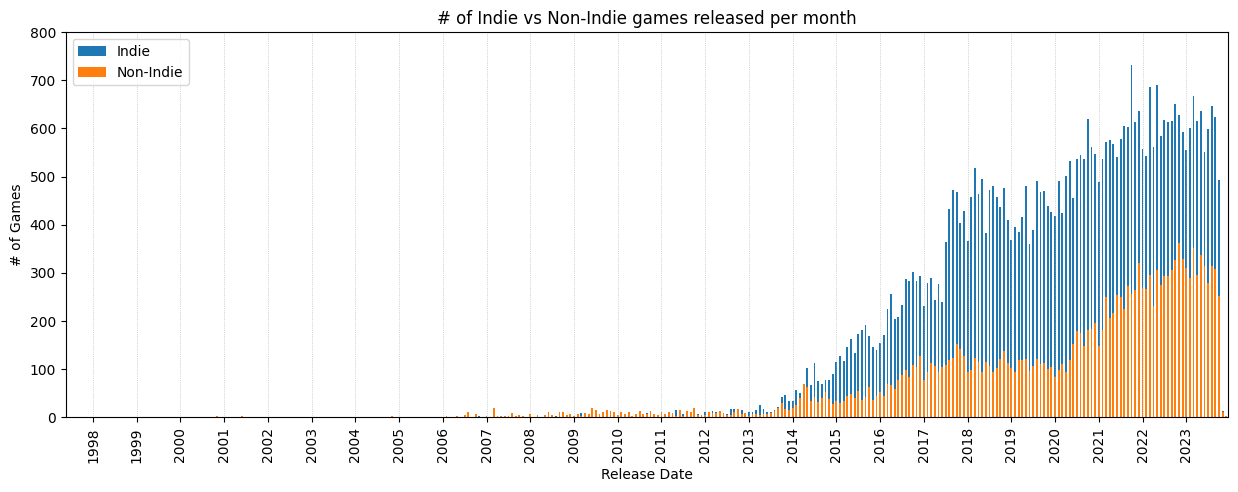

In [2]:
#| code-fold: show
#| code-summary: "Show the code"

# Calculate date range of the data
dataset_months = dataset.drop_duplicates("name").release_date.dt.to_period('M')
date_range = pd.period_range(start=dataset_months.min(), end=dataset_months.max(), freq='M')

# Get counts of indie games released each month
indie_months = indie_dataset.drop_duplicates("name").release_date.dt.to_period('M')
indie_counts = indie_months.value_counts().reindex(date_range, fill_value=0).sort_index()

# Get counts of non-indie games released each month
nonindie_months = nonindie_dataset.drop_duplicates("name").release_date.dt.to_period('M')
nonindie_counts = nonindie_months.value_counts().reindex(date_range, fill_value=0).sort_index()

# Graph data
ticks = []
labels = []
for i, period in enumerate(indie_counts.index):
    if period.month == 1:  # Show the tick at the start of each year
        ticks.append(i)
        labels.append(str(period.year))
ax = indie_counts.plot(kind='bar', figsize=(15,5), label="Indie")
nonindie_counts.plot(kind='bar', ax=ax, color='C1', label="Non-Indie")
plt.xticks(ticks=ticks, labels=labels)
plt.grid(axis='x', linestyle=':', linewidth=0.5)
ax.set_ylim(0, 800)
plt.legend()
plt.title("# of Indie vs Non-Indie games released per month")
plt.xlabel("Release Date")
plt.ylabel("# of Games");

Unexpectedly, there is a very clear starting point when the number of games started growing significantly, around 2014 and possibly a year or two earlier. This may be, however, simply the natural growth of the platform. The raw number of indie games will inevitably be larger than triple A due to the larger number of independent developers. However, one notable pattern is the sudden jump in the middle of 2017 for indie games. This jump coincides with the new Steam Direct model that allowed any game to be published on the platform as long as the right documentation was files. This change didn't affect triple A games significantly however as the data proves, it allowed for a much larger number of indie developers to publish games on the platform. [More information on that can be found here.](https://steamcommunity.com/games/593110/announcements/detail/1328973169870947116)

One issue I want to be mindful of is that a majority of indie games aren't going to be played (most lack the resources to properly market a game). These games won't have a significant impact on the gaming community as a whole, thus I want to filter them out to focus on games that have the potential to cause significant shifts in the gaming community. However I'll occasionally bring them back to see if there are trends in terms of **what** games are being made. 

Below is a graph is the same as above except filtered for games with at least 20000 players (estimated).

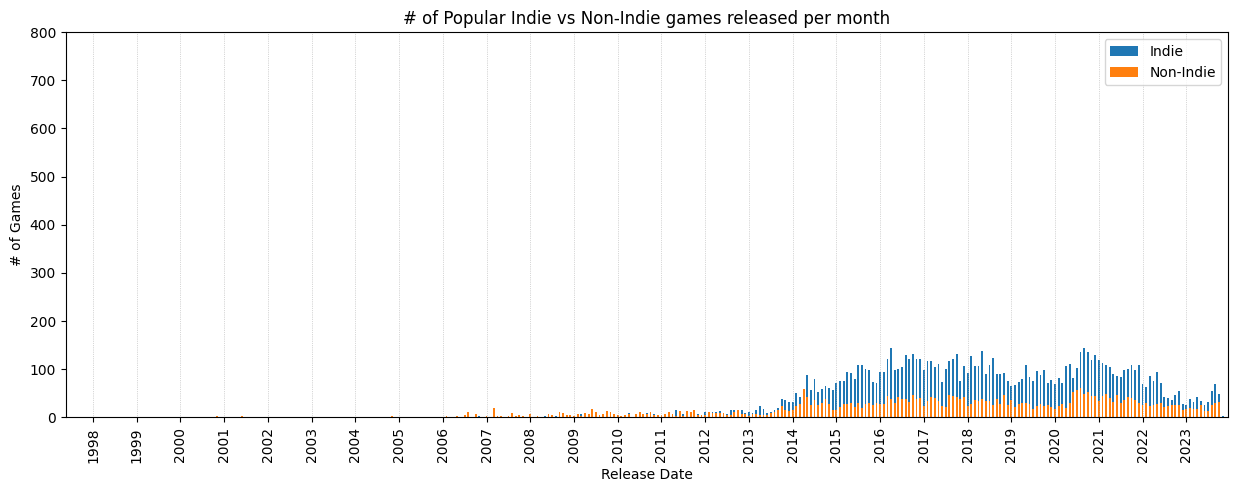

In [274]:
#| code-fold: true
#| code-summary: "Show the code"

# Calculate date range of the data
dataset_months = dataset.drop_duplicates("name").release_date.dt.to_period('M')
date_range = pd.period_range(start=dataset_months.min(), end=dataset_months.max(), freq='M')

# Get counts of indie games released each month, filtering for popular games
indie_filtered = indie_dataset.drop_duplicates("name")
indie_popular = indie_filtered[indie_filtered['estimated_owners'] != "0 - 20000"]
indie_popular = indie_popular[indie_popular['estimated_owners'] != "0 - 0"]
indie_pop_months = indie_popular.release_date.dt.to_period('M')
indie_pop_counts = indie_pop_months.value_counts().reindex(date_range, fill_value=0).sort_index()

# Get counts of nonindie games released each month, filtering for popular games
nonindie_filtered = nonindie_dataset.drop_duplicates("name")
nonindie_popular = nonindie_filtered[nonindie_filtered['estimated_owners'] != "0 - 20000"]
nonindie_popular = nonindie_popular[nonindie_popular['estimated_owners'] != "0 - 0"]
nonindie_pop_months = nonindie_popular.release_date.dt.to_period('M')
nonindie_pop_counts = nonindie_pop_months.value_counts().reindex(date_range, fill_value=0).sort_index()

# Graph data
ticks = []
labels = []
for i, period in enumerate(indie_pop_counts.index):
    if period.month == 1:  # Show the tick at the start of each year
        ticks.append(i)
        labels.append(str(period.year))
ax = indie_pop_counts.plot(kind='bar', figsize=(15,5), label="Indie")
nonindie_pop_counts.plot(kind='bar', ax=ax, color='C1', label="Non-Indie")
plt.xticks(ticks=ticks, labels=labels)
plt.grid(axis='x', linestyle=':', linewidth=0.5)
ax.set_ylim(0, 800)
plt.legend()
plt.title("# of Popular Indie vs Non-Indie games released per month")
plt.xlabel("Release Date")
plt.ylabel("# of Games");

An alternate version that shows the "unplayed" games below the x-axis.

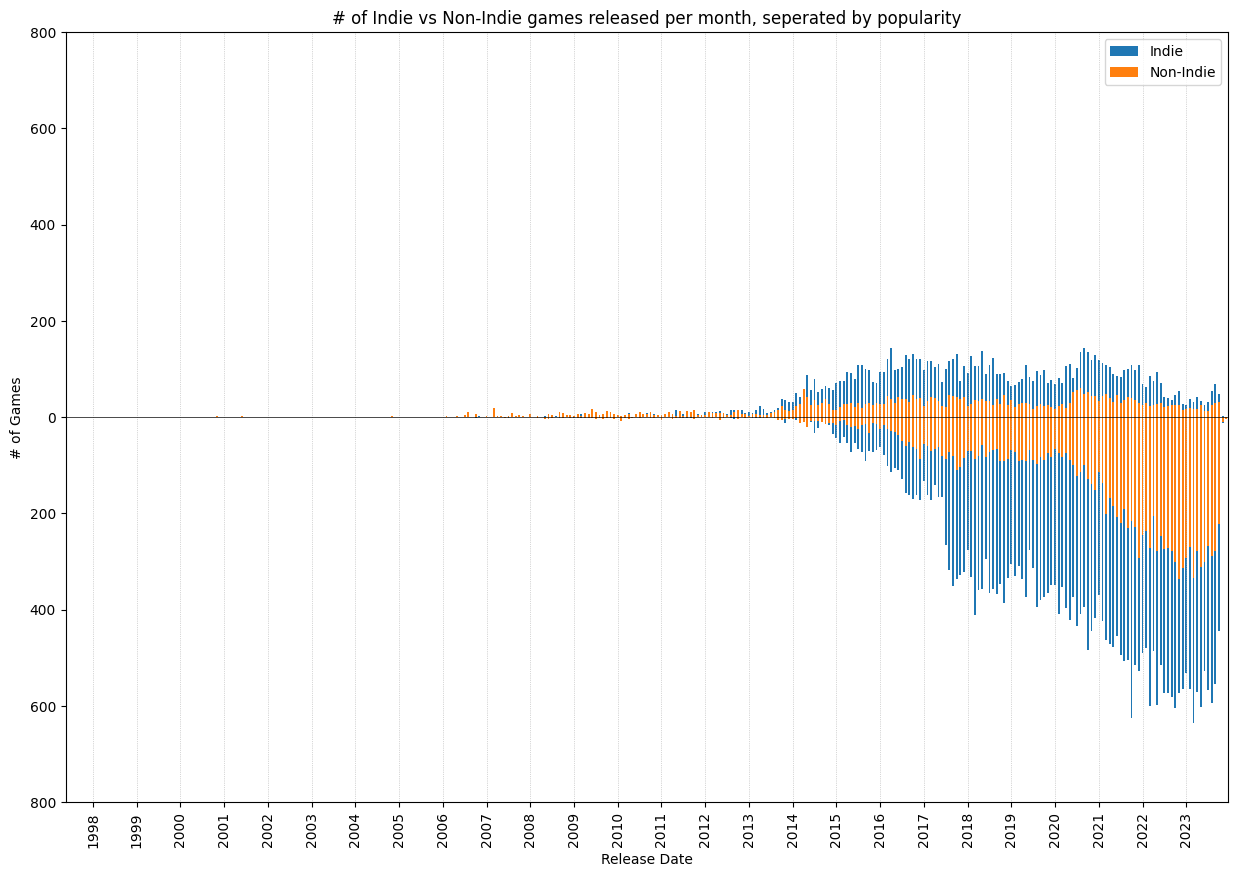

In [276]:
#| code-fold: true
#| code-summary: "Show the code"

# Calculate date range of the data
dataset_months = dataset.drop_duplicates("name").release_date.dt.to_period('M')
date_range = pd.period_range(start=dataset_months.min(), end=dataset_months.max(), freq='M')


indie_filtered = indie_dataset.drop_duplicates("name")

# Get counts of indie games released each month, filtering for popular games
indie_popular = indie_filtered[indie_filtered['estimated_owners'] != "0 - 20000"]
indie_popular = indie_popular[indie_popular['estimated_owners'] != "0 - 0"]
indie_pop_months = indie_popular.release_date.dt.to_period('M')
indie_pop_counts = indie_pop_months.value_counts().reindex(date_range, fill_value=0).sort_index()

# Get counts of indie games released each month, filtering for unpopular games
indie_unpopular = indie_filtered[indie_filtered['estimated_owners'].isin(["0 - 0", "0 - 20000"])]
indie_unpop_months = indie_unpopular.release_date.dt.to_period('M')
indie_unpop_counts = indie_unpop_months.value_counts().reindex(date_range, fill_value=0).sort_index()
indie_unpop_counts *= -1


nonindie_filtered = nonindie_dataset.drop_duplicates("name")

# Get counts of nonindie games released each month, filtering for popular games
nonindie_popular = nonindie_filtered[nonindie_filtered['estimated_owners'] != "0 - 20000"]
nonindie_popular = nonindie_popular[nonindie_popular['estimated_owners'] != "0 - 0"]
nonindie_pop_months = nonindie_popular.release_date.dt.to_period('M')
nonindie_pop_counts = nonindie_pop_months.value_counts().reindex(date_range, fill_value=0).sort_index()

# Get counts of nonindie games released each month, filtering for popular games
nonindie_unpopular = nonindie_filtered[nonindie_filtered['estimated_owners'].isin(["0 - 0", "0 - 20000"])]
nonindie_unpop_months = nonindie_unpopular.release_date.dt.to_period('M')
nonindie_unpop_counts = nonindie_unpop_months.value_counts().reindex(date_range, fill_value=0).sort_index()
nonindie_unpop_counts *= -1

# Graph data
ticks = []
labels = []
for i, period in enumerate(indie_pop_counts.index):
    if period.month == 1:  # Show the tick at the start of each year
        ticks.append(i)
        labels.append(str(period.year))
ax = indie_pop_counts.plot(kind='bar', figsize=(15,10), label="Indie")
nonindie_pop_counts.plot(kind='bar', ax=ax, color='C1', label="Non-Indie")
indie_unpop_counts.plot(kind='bar', ax=ax, color='C0', label="_nolegend_")
nonindie_unpop_counts.plot(kind='bar', ax=ax, color='C1', label="_nolegend_")
plt.xticks(ticks=ticks, labels=labels)
plt.grid(axis='x', linestyle=':', linewidth=0.5);
plt.axhline(y=0, color='black', linewidth=0.5)
ax.set_ylim(-800, 800)
ax.yaxis.set_major_formatter(lambda x, pos: f'{abs(x):g}')
plt.legend()
plt.title("# of Indie vs Non-Indie games released per month, seperated by popularity")
plt.xlabel("Release Date")
plt.ylabel("# of Games");

The second graph is the one that is more interesting. While popular indie games are still greater in number, their fluctuations in growth are no different than the popular triple A games. In contrast, unpopular/unknown games tell a different story. The number of unpopular triple A games tend to wax and wane at the same rate that unpopular indie games do, however the quantity of unpopular indie games vastly out number of unpopular triple A games. There is also an obvious point where the chasm between unpopular triple A and indie grew, the same mid-2017 date we observed before. We can see clearly now that the sudden jump of the number of indie games we observed in the first graph went mostly into the amount of unpopular indie games on the platform, with none of it contributing to the number of popular indie games.

Another point of interest is the convergence of the number of popular indie and triple A games starting from 2021 to now. Based on my knowledge of the general gaming sphere, this trend is likely due to the increase in high effort indie titles over the past few years. With smash-hit titles like [Hollow Knight](https://store.steampowered.com/app/367520/Hollow_Knight/) raising the bar for indie games mixed with the over-saturation in the indie scene, its reasonable to assume that gamers have gotten more picky about the indie titles they're willing to play while in tandum serious indie developers are focusing a lot more on quality now than quantity

#### Cost of Games

When going through the reasons why or why not people will buy or like a game, cost unsurprisingly is a pretty major factor. There is a lot of discourse surrounding the rising costs of triple A titles, going from a 50 dollars standard to 60, and now major companies are again raising the baseline to 70. As costs of gaming as a hobby rise, I want to see if this is a general trend in gaming as a whole, or whether this is something exclusive to triple A games.

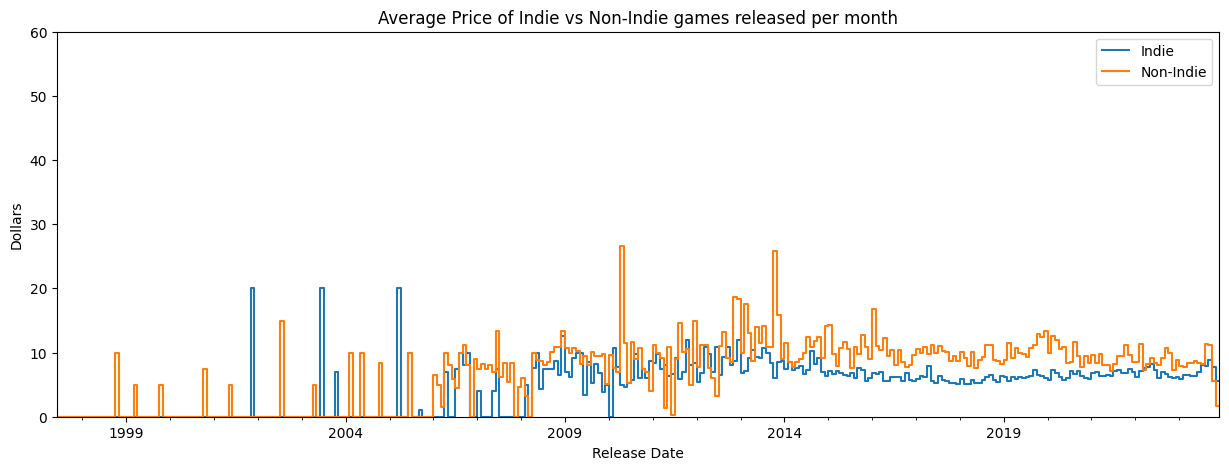

In [5]:
#| code-fold: true
#| code-summary: "Show the code"

# Calculate date range of the data
dataset_months = dataset.drop_duplicates("name").release_date.dt.to_period('M')
date_range = pd.period_range(start=dataset_months.min(), end=dataset_months.max(), freq='M')

# Get average cost of indie games released each month
indie_months = indie_dataset.drop_duplicates("name").copy()
indie_months["release_date"] = indie_months["release_date"].dt.to_period('M')
indie_prices = indie_months[["price", "release_date"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# # Get average cost of non-indie games released each month
nonindie_months = nonindie_dataset.drop_duplicates("name").copy()
nonindie_months["release_date"] = nonindie_months["release_date"].dt.to_period('M')
nonindie_prices = nonindie_months[["price", "release_date"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# # Graph data
ax = indie_prices.plot(drawstyle="steps", kind='line', figsize=(15,5), label="Indie")
nonindie_prices.plot(drawstyle="steps", kind='line', ax=ax, color='C1', label="Non-Indie")
ax.set_ylim(0, 60)
handles, labels = ax.get_legend_handles_labels()
labels = ["Indie", "Non-Indie"]
plt.legend(handles, labels)
plt.title("Average Price of Indie vs Non-Indie games released per month")
plt.xlabel("Release Date")
plt.ylabel("Dollars");

Surprisingly the mean cost of games hasn't fluctuated much over time. The game prior to 2006 seem to fluctuate a lot more in pricing, but that is due to the fact that theres not much data for that period of time. Overall though this data doesn't make much sense considering the trends in game pricing as reported by major studios. The most apparent trend though is that indie games typically cost less than triple A games, an unsurprisingly fact.

A major factor that may be skewing this data is the fact that along with the rising prices of triple A games, there has also been a rise in the number of free to play games. These games make a majority of their money from in game purchases, as such their profits won't really be revealed in this graph. To account for this, lets graph the data again, this time removing all free games.

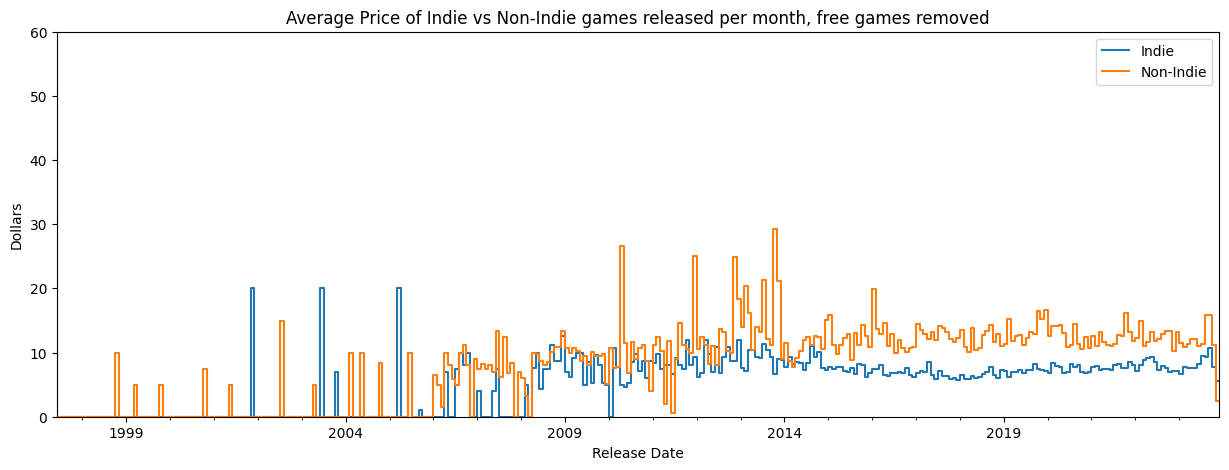

In [6]:
# Calculate date range of the data
dataset_months = dataset.drop_duplicates("name").release_date.dt.to_period('M')
date_range = pd.period_range(start=dataset_months.min(), end=dataset_months.max(), freq='M')

# Get average cost of indie games released each month
indie_months = indie_dataset.drop_duplicates("name").copy()
indie_months = indie_months[indie_months['price'] != 0]
indie_months["release_date"] = indie_months["release_date"].dt.to_period('M')
indie_prices = indie_months[["price", "release_date"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# # Get average cost of non-indie games released each month
nonindie_months = nonindie_dataset.drop_duplicates("name").copy()
nonindie_months = nonindie_months[nonindie_months['price'] != 0]
nonindie_months["release_date"] = nonindie_months["release_date"].dt.to_period('M')
nonindie_prices = nonindie_months[["price", "release_date"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# # Graph data
ax = indie_prices.plot(drawstyle="steps", kind='line', figsize=(15,5))
nonindie_prices.plot(drawstyle="steps", kind='line', ax=ax, color='C1')
ax.set_ylim(0, 60)
handles, labels = ax.get_legend_handles_labels()
labels = ["Indie", "Non-Indie"]
plt.legend(handles, labels)
plt.title("Average Price of Indie vs Non-Indie games released per month, free games removed")
plt.xlabel("Release Date")
plt.ylabel("Dollars");

Surprisingly again, not much change. One last filter, only considering games with a significant player base.

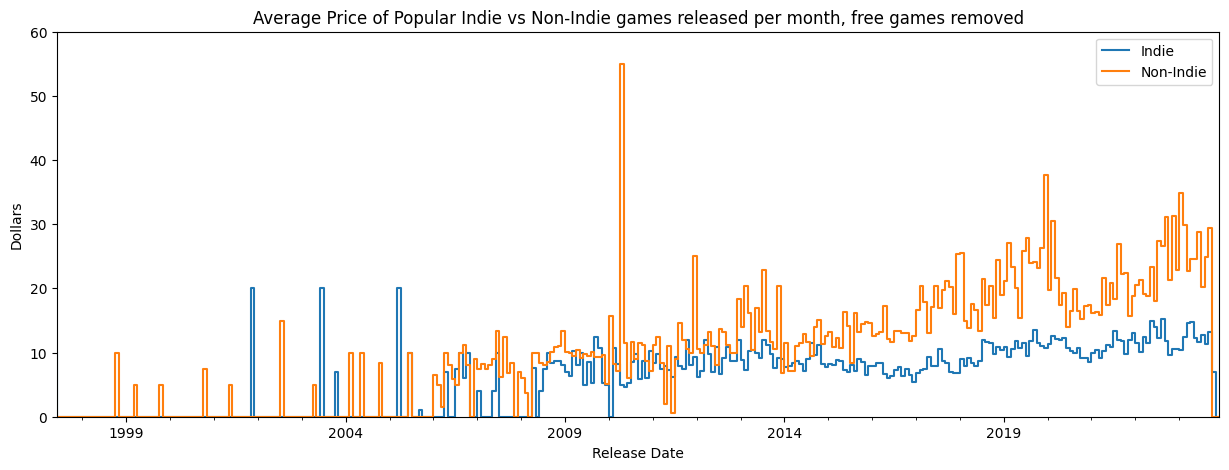

In [277]:
#| code-fold: true
#| code-summary: "Show the code"

# Calculate date range of the data
dataset_months = dataset.drop_duplicates("name").release_date.dt.to_period('M')
date_range = pd.period_range(start=dataset_months.min(), end=dataset_months.max(), freq='M')

# Get average cost of indie games released each month, filtering for popular games
indie_months = indie_dataset.drop_duplicates("name").copy()
indie_months = indie_months[indie_months['estimated_owners'] != "0 - 20000"]
indie_months = indie_months[indie_months['estimated_owners'] != "0 - 0"]
indie_months = indie_months[indie_months['price'] != 0]
indie_months["release_date"] = indie_months["release_date"].dt.to_period('M')
indie_prices = indie_months[["price", "release_date"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# # Get average cost of non-indie games released each month, filtering for popular games
nonindie_months = nonindie_dataset.drop_duplicates("name").copy()
nonindie_months = nonindie_months[nonindie_months['estimated_owners'] != "0 - 20000"]
nonindie_months = nonindie_months[nonindie_months['estimated_owners'] != "0 - 0"]
nonindie_months = nonindie_months[nonindie_months['price'] != 0]
nonindie_months["release_date"] = nonindie_months["release_date"].dt.to_period('M')
nonindie_prices = nonindie_months[["price", "release_date"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# # Graph data
ax = indie_prices.plot(drawstyle="steps", kind='line', figsize=(15,5))
nonindie_prices.plot(drawstyle="steps", kind='line', ax=ax, color='C1')
ax.set_ylim(0, 60)
handles, labels = ax.get_legend_handles_labels()
labels = ["Indie", "Non-Indie"]
plt.legend(handles, labels)
plt.title("Average Price of Popular Indie vs Non-Indie games released per month, free games removed")
plt.xlabel("Release Date")
plt.ylabel("Dollars");

The expected pattern now emerges, the prices of triple A games rising over time while indie games have stayed relatively the same. When smoothed out to average price per year rather than month.

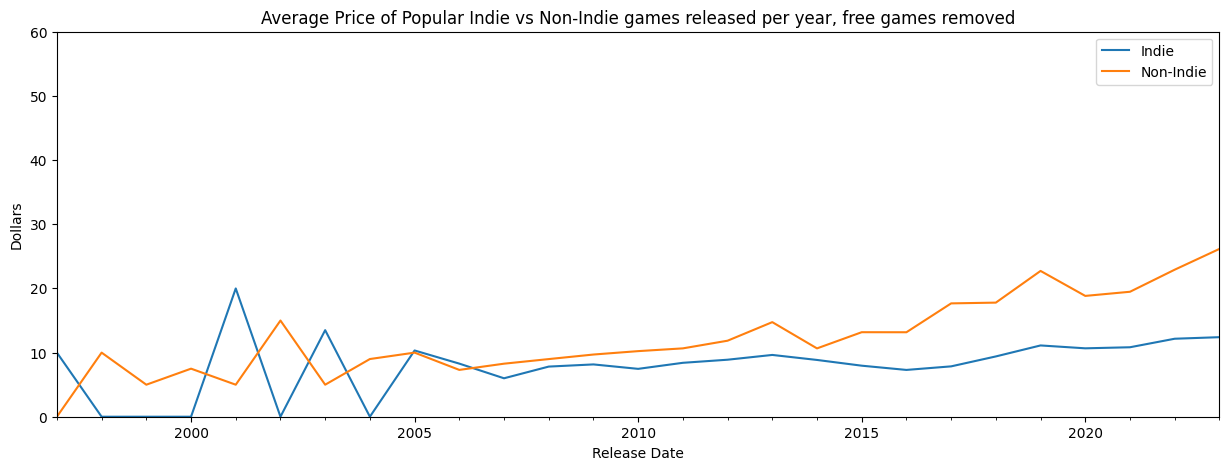

In [278]:
#| code-fold: true
#| code-summary: "Show the code"

# Calculate date range of the data
dataset_years = dataset.drop_duplicates("name").release_date.dt.to_period('Y')
date_range = pd.period_range(start=dataset_years.min(), end=dataset_years.max(), freq='Y')

# Get average cost of indie games released each year
indie_years = indie_dataset.drop_duplicates("name").copy()
indie_years = indie_years[indie_years['estimated_owners'] != "0 - 20000"]
indie_years = indie_years[indie_years['estimated_owners'] != "0 - 0"]
indie_years = indie_years[indie_years['price'] != 0]
indie_years["release_date"] = indie_years["release_date"].dt.to_period('Y')
indie_prices = indie_years[["price", "release_date"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# # Get average cost of non-indie games released each year
nonindie_years = nonindie_dataset.drop_duplicates("name").copy()
nonindie_years = nonindie_years[nonindie_years['estimated_owners'] != "0 - 20000"]
nonindie_years = nonindie_years[nonindie_years['estimated_owners'] != "0 - 0"]
nonindie_years = nonindie_years[nonindie_years['price'] != 0]
nonindie_years["release_date"] = nonindie_years["release_date"].dt.to_period('Y')
nonindie_prices = nonindie_years[["price", "release_date"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# # Graph data
ax = indie_prices.plot(kind='line', figsize=(15,5))
nonindie_prices.plot(kind='line', ax=ax, color='C1')
ax.set_ylim(0, 60)
labels = ["Indie", "Non-Indie"]
plt.legend(handles, labels)
plt.title("Average Price of Popular Indie vs Non-Indie games released per year, free games removed")
plt.xlabel("Release Date")
plt.ylabel("Dollars");

The divergence in prices is now very apparent. While indie games haven't changed much in price, going from slightly below 10 dollars to slightly above, triple A games has been growing substantially. With a staring average cost of 10 dollars, the cost has grown to over double of that, ending at around 25 dollars. It confirms that yes, for the games that most player are playing, the average cost of triple A games has been growing over time. It is very likely that this trend will strong influence the general sentiment of a game (an average game could be interpreted as bad if its overpriced), thus this is an important trend to note going into review sentiment analysis.

### Identified Trends from Exploratory Analysis

Overall two things can be concluded. 

First, the quantity of indie games significantly outweighs the number of triple A games on Steam, while also having a very heavy slant toward unpopular games. Keeping this in mind while doing sentiment analysis is extremely important, for the overabundance little known indie Steam games may significantly skew the end results of the sentiment analysis. A majority of these unpopular games are best described as "student projects", inherently lacking in quality and therefore attracting only a couple reviews that are more likely than not to be negative. Filtering by popularity seems to be the best way to mitigate the imbalance in popularity, though this filtering should be noted when evaluating the results.

Second, overall changes in the cost in triple-A games has been rising steadily over time at a significant rate. There is a high chance that price will become more and more of a reason behind negative reviews for triple-A games, thus it'll be something to look out for if a strong downward trend in triple-A game sentiment is revealed.

### Player Sentiment

An important note, while yes Steam gives average user ratings on their Steam page and totals the number of positive vs. negative reviews, reviews tend do have a lot more nuance then a binary recommend/not recommend. Some reviewers may be extremely mixed about a game but still slightly lean toward not, and vice versa. Hence sentiment analysis will be used to identify these nuances and get a better measure of how players feel about a game.

#### Review Sentiment Scores

The below code takes in the dataset and preforms a sentiment analysis on the text of each review, then separates the dataset into indie games and non-indie games. 
**Warning**: Due to the sheer number of reviews in the data set (around 50 million after filtering), the following code takes a **very long time** to run. It took me around **8 hours** to finish running the code (with a very well spec'd PC), even with swifter optimization (automatic vectorization, multithreading, etc.). The data processed is saved as a file so that the sentiment analysis doesn't have to be run multiple times, however be prepared for this section to take a while.

In [2]:
import matplotlib.pyplot as plt
import nltk

from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RSheep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RSheep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\RSheep\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\RSheep\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [2]:
import swifter
import tqdm as notebook_tqdm


my_file = Path("Data/sentiment.pkl")
if my_file.is_file():
    sentiment_data = pd.read_pickle("Data/sentiment.pkl")
else:
    # Init sentiment analyzer
    
    engStopwords = stopwords.words('english')
    sentimentAnalyzer = vader.SentimentIntensityAnalyzer()
    
    # Filter dataset for just reviews
    
    review_dataset = dataset[dataset["language"] == "english"]
    review_dataset = review_dataset[["game", "release_date", "review"]]
    
    # Function that returns the sentiment score of a review
    
    def getSentiment(row):
        try:
            words = word_tokenize(row["review"])
        except Exception as e:
            return pd.NA
        score = 0
        for w in words:
            score += sentimentAnalyzer.polarity_scores(w)['compound']
        return score
    
    # Generate sentiment scores for all the reviews in the dataset
    # WARNING: THIS CODE TAKES AROUND 8 HOURS TO RUN
    
    sentiment_data = review_dataset.swifter.apply(getSentiment, axis=1)
    
    sentiment_data = pd.to_numeric(sentiment_data)
    sentiment_data.to_pickle("Data/sentiment.pkl")

# Add sentiment data to dataset
review_dataset = dataset[dataset["language"] == "english"].copy()
review_dataset["sentiment"] = sentiment_data

# Split into indie and non-indie
review_indie_dataset = review_dataset[review_dataset.genres.map(lambda x : "Indie" in x) | review_dataset.tags.map(lambda x : "Indie" in dict(x).keys())]
review_nonindie_dataset = review_dataset[review_dataset.genres.map(lambda x : "Indie" not in x) & review_dataset.tags.map(lambda x : "Indie" not in dict(x).keys())]

C:\Users\RSheep\.conda\envs\dh140\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [286]:
review_nonindie_dataset.head()

,name,release_date,required_age,price,detailed_description,about_the_game,short_description,genres,positive,negative,...,average_playtime_forever,tags,game,language,review,timestamp_created,voted_up,release_year,release_month,sentiment
141,Wartune Reborn,2021-02-26,0,0.0,Feel tired of auto-fight? Feel tired of boring...,Feel tired of auto-fight? Feel tired of boring...,'Wartune Reborn' epic magic TBS game was devel...,"[Adventure, Casual, Free to Play, Massively Mu...",87,49,...,0,"{'Turn-Based Combat': 292, 'Massively Multipla...",Wartune Reborn,english,Fun game but with a bit of pay to win,1698161278,1,2021,2,0.9938
143,Wartune Reborn,2021-02-26,0,0.0,Feel tired of auto-fight? Feel tired of boring...,Feel tired of auto-fight? Feel tired of boring...,'Wartune Reborn' epic magic TBS game was devel...,"[Adventure, Casual, Free to Play, Massively Mu...",87,49,...,0,"{'Turn-Based Combat': 292, 'Massively Multipla...",Wartune Reborn,english,"Is antistres, and the best game of all!",1697979320,1,2021,2,0.6369
145,Wartune Reborn,2021-02-26,0,0.0,Feel tired of auto-fight? Feel tired of boring...,Feel tired of auto-fight? Feel tired of boring...,'Wartune Reborn' epic magic TBS game was devel...,"[Adventure, Casual, Free to Play, Massively Mu...",87,49,...,0,"{'Turn-Based Combat': 292, 'Massively Multipla...",Wartune Reborn,english,a blast from the past 9 years ago to be exact,1697283258,1,2021,2,0.0000
146,Wartune Reborn,2021-02-26,0,0.0,Feel tired of auto-fight? Feel tired of boring...,Feel tired of auto-fight? Feel tired of boring...,'Wartune Reborn' epic magic TBS game was devel...,"[Adventure, Casual, Free to Play, Massively Mu...",87,49,...,0,"{'Turn-Based Combat': 292, 'Massively Multipla...",Wartune Reborn,english,Pay to win slow load..trash game,1695433549,0,2021,2,0.4832
151,Wartune Reborn,2021-02-26,0,0.0,Feel tired of auto-fight? Feel tired of boring...,Feel tired of auto-fight? Feel tired of boring...,'Wartune Reborn' epic magic TBS game was devel...,"[Adventure, Casual, Free to Play, Massively Mu...",87,49,...,0,"{'Turn-Based Combat': 292, 'Massively Multipla...",Wartune Reborn,english,I live this game,1692061364,1,2021,2,0.0000


## Results

### Sentiment Data vs. Games Per Month

This section will be dedicated to analyzing the changes in sentiment over time with respect to the games that were released per month. The same techniques used to analyze the quantity of games released per month will be used here to analyze and account for game popularity and the quantity of games when doing sentiment analysis.

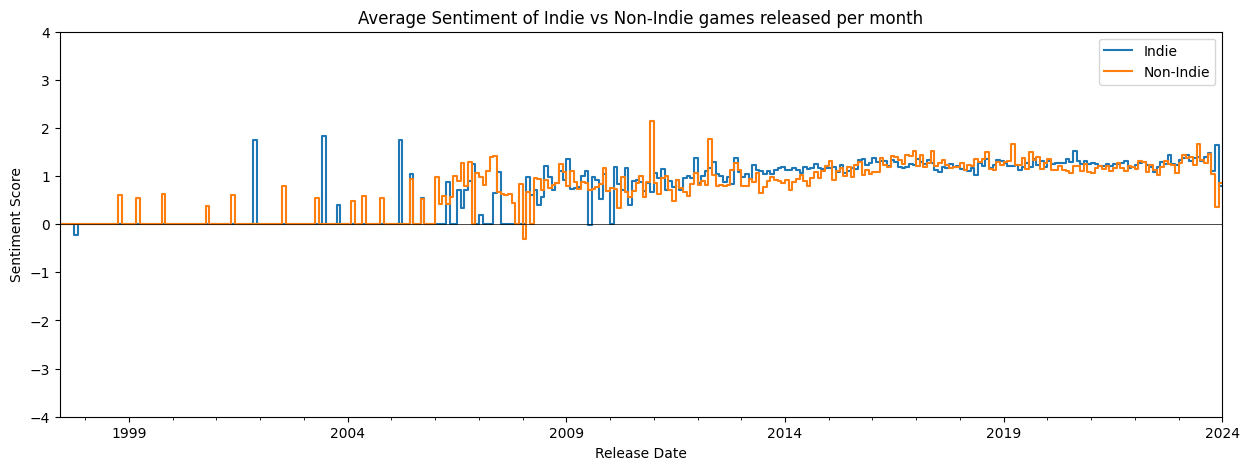

In [4]:
#| code-fold: true
#| code-summary: "Show the code"


# Calculate date range of the data
dataset_months = review_dataset.release_date.dt.to_period('M')
date_range = pd.period_range(start=dataset_months.min(), end=dataset_months.max(), freq='M')

# Get average cost of indie games released each month
indie_months = review_indie_dataset[["release_date", "sentiment", "game"]].copy().groupby("game").mean()
indie_months["release_date"] = indie_months["release_date"].dt.to_period('M')
indie_sentiment = indie_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# Get average cost of non-indie games released each month
nonindie_months = review_nonindie_dataset[["release_date", "sentiment", "game"]].copy().groupby("game").mean()
nonindie_months["release_date"] = nonindie_months["release_date"].dt.to_period('M')
nonindie_sentiment = nonindie_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# Graph data
ax = indie_sentiment.plot(drawstyle="steps", kind='line', figsize=(15,5), label="Indie")
nonindie_sentiment.plot(drawstyle="steps", kind='line', ax=ax, color='C1', label="Non-Indie")
ax.set_ylim(-4, 4)
handles, labels = ax.get_legend_handles_labels()
labels = ["Indie", "Non-Indie"]
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend(handles, labels)
plt.title("Average Sentiment of Indie vs Non-Indie games released per month")
plt.xlabel("Release Date")
plt.ylabel("Sentiment Score");

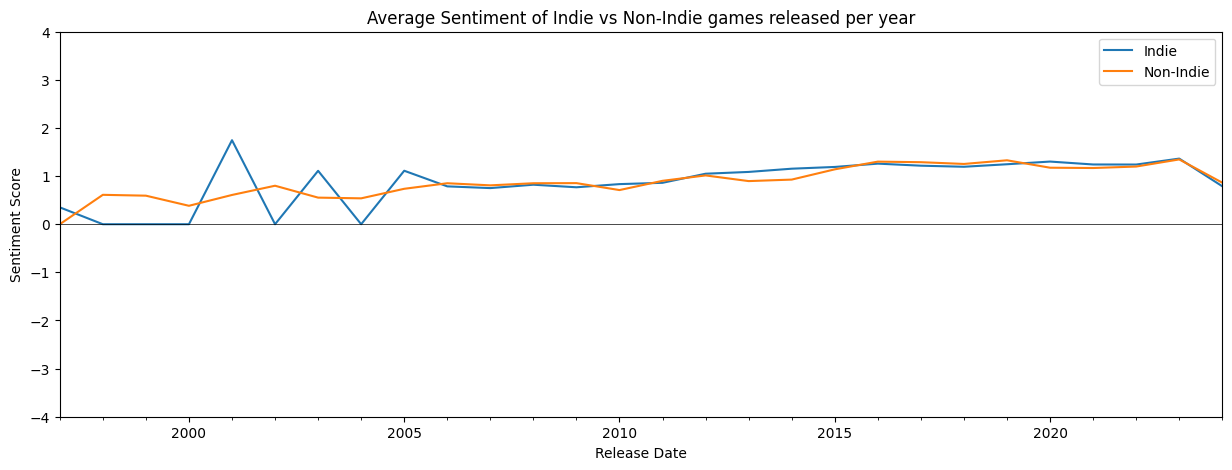

In [348]:
#| code-fold: true
#| code-summary: "Show the code"


# Calculate date range of the data
dataset_months = review_dataset.release_date.dt.to_period('Y')
date_range = pd.period_range(start=dataset_months.min(), end=dataset_months.max(), freq='Y')

# Get average cost of indie games released each month
indie_months = review_indie_dataset[["release_date", "sentiment", "game"]].copy().groupby("game").mean()
indie_months["release_date"] = indie_months["release_date"].dt.to_period('Y')
indie_sentiment = indie_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# Get average cost of non-indie games released each month
nonindie_months = review_nonindie_dataset[["release_date", "sentiment", "game"]].copy().groupby("game").mean()
nonindie_months["release_date"] = nonindie_months["release_date"].dt.to_period('Y')
nonindie_sentiment = nonindie_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# Graph data
ax = indie_sentiment.plot(kind='line', figsize=(15,5), label="Indie")
nonindie_sentiment.plot(kind='line', ax=ax, color='C1', label="Non-Indie")
ax.set_ylim(-4, 4)
handles, labels = ax.get_legend_handles_labels()
labels = ["Indie", "Non-Indie"]
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend(handles, labels)
plt.title("Average Sentiment of Indie vs Non-Indie games released per year")
plt.xlabel("Release Date")
plt.ylabel("Sentiment Score");

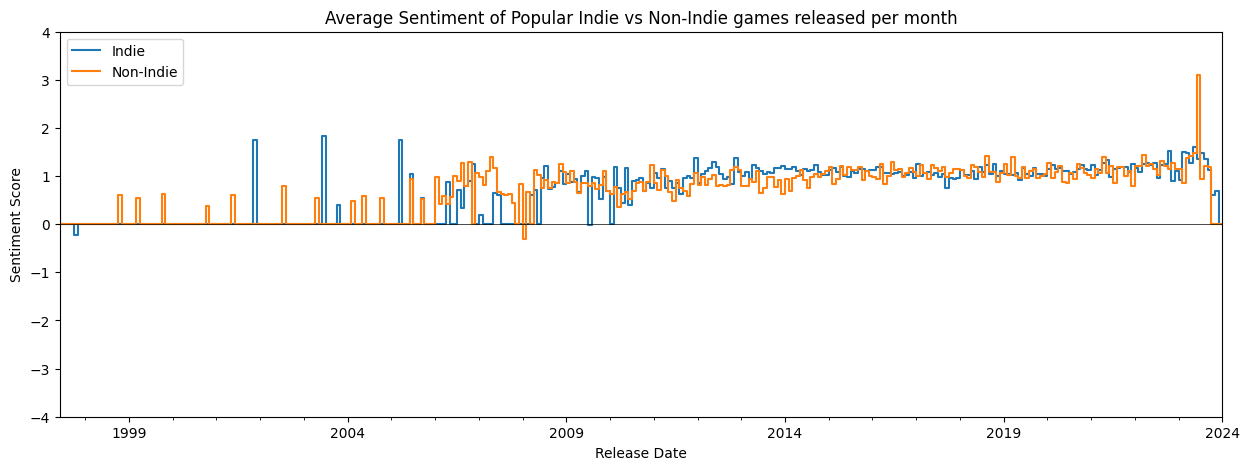

In [344]:
#| code-fold: true
#| code-summary: "Show the code"


# Calculate date range of the data
dataset_months = review_dataset.release_date.dt.to_period('M')
date_range = pd.period_range(start=dataset_months.min(), end=dataset_months.max(), freq='M')

# Get average cost of indie games released each month
indie_pop_months = review_indie_dataset.copy()
indie_pop_months = indie_pop_months[indie_pop_months['estimated_owners'] != "0 - 20000"]
indie_pop_months = indie_pop_months[indie_pop_months['estimated_owners'] != "0 - 0"]
indie_pop_months = indie_pop_months[["release_date", "sentiment", "game"]].groupby("game").mean()
indie_pop_months["release_date"] = indie_pop_months["release_date"].dt.to_period('M')
indie_sentiment = indie_pop_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# Get average cost of non-indie games released each month
nonindie_pop_months = review_nonindie_dataset.copy()
nonindie_pop_months = nonindie_pop_months[nonindie_pop_months['estimated_owners'] != "0 - 20000"]
nonindie_pop_months = nonindie_pop_months[nonindie_pop_months['estimated_owners'] != "0 - 0"]
nonindie_pop_months = nonindie_pop_months[["release_date", "sentiment", "game"]].groupby("game").mean()
nonindie_pop_months["release_date"] = nonindie_pop_months["release_date"].dt.to_period('M')
nonindie_sentiment = nonindie_pop_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# # Graph data
ax = indie_sentiment.plot(drawstyle="steps", kind='line', figsize=(15,5), label="Indie")
nonindie_sentiment.plot(drawstyle="steps", kind='line', ax=ax, color='C1', label="Non-Indie")
ax.set_ylim(-4, 4)
handles, labels = ax.get_legend_handles_labels()
labels = ["Indie", "Non-Indie"]
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend(handles, labels)
plt.title("Average Sentiment of Popular Indie vs Non-Indie games released per month")
plt.xlabel("Release Date")
plt.ylabel("Sentiment Score");

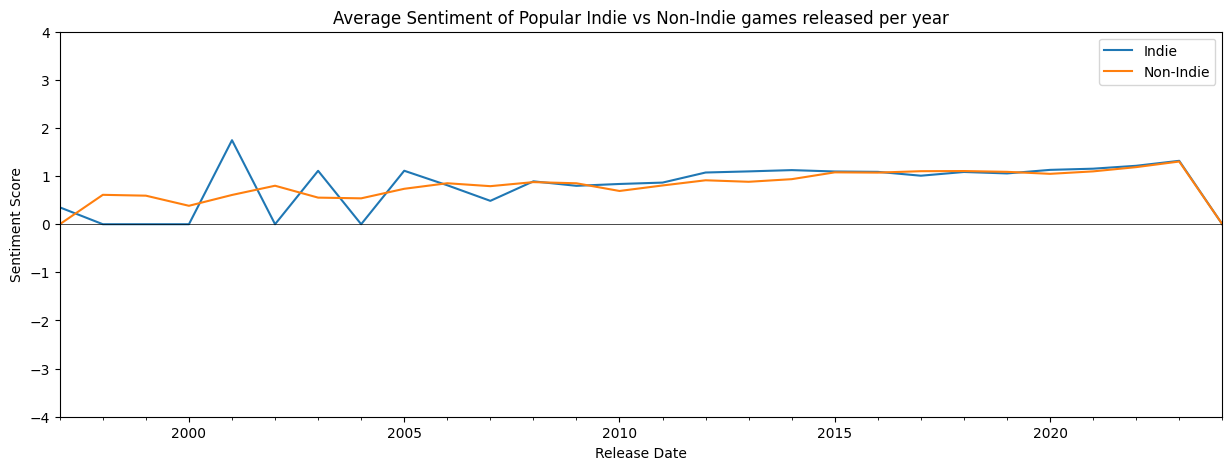

In [5]:
#| code-fold: true
#| code-summary: "Show the code"


# Calculate date range of the data
dataset_months = review_dataset.release_date.dt.to_period('Y')
date_range = pd.period_range(start=dataset_months.min(), end=dataset_months.max(), freq='Y')

# Get average cost of indie games released each month
indie_pop_months = review_indie_dataset.copy()
indie_pop_months = indie_pop_months[indie_pop_months['estimated_owners'] != "0 - 20000"]
indie_pop_months = indie_pop_months[indie_pop_months['estimated_owners'] != "0 - 0"]
indie_pop_months = indie_pop_months[["release_date", "sentiment", "game"]].groupby("game").mean()
indie_pop_months["release_date"] = indie_pop_months["release_date"].dt.to_period('Y')
indie_sentiment = indie_pop_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# Get average cost of non-indie games released each month
nonindie_pop_months = review_nonindie_dataset.copy()
nonindie_pop_months = nonindie_pop_months[nonindie_pop_months['estimated_owners'] != "0 - 20000"]
nonindie_pop_months = nonindie_pop_months[nonindie_pop_months['estimated_owners'] != "0 - 0"]
nonindie_pop_months = nonindie_pop_months[["release_date", "sentiment", "game"]].groupby("game").mean()
nonindie_pop_months["release_date"] = nonindie_pop_months["release_date"].dt.to_period('Y')
nonindie_sentiment = nonindie_pop_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# # Graph data
ax = indie_sentiment.plot(kind='line', figsize=(15,5), label="Indie")
nonindie_sentiment.plot(kind='line', ax=ax, color='C1', label="Non-Indie")
ax.set_ylim(-4, 4)
handles, labels = ax.get_legend_handles_labels()
labels = ["Indie", "Non-Indie"]
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend(handles, labels)
plt.title("Average Sentiment of Popular Indie vs Non-Indie games released per year")
plt.xlabel("Release Date")
plt.ylabel("Sentiment Score");

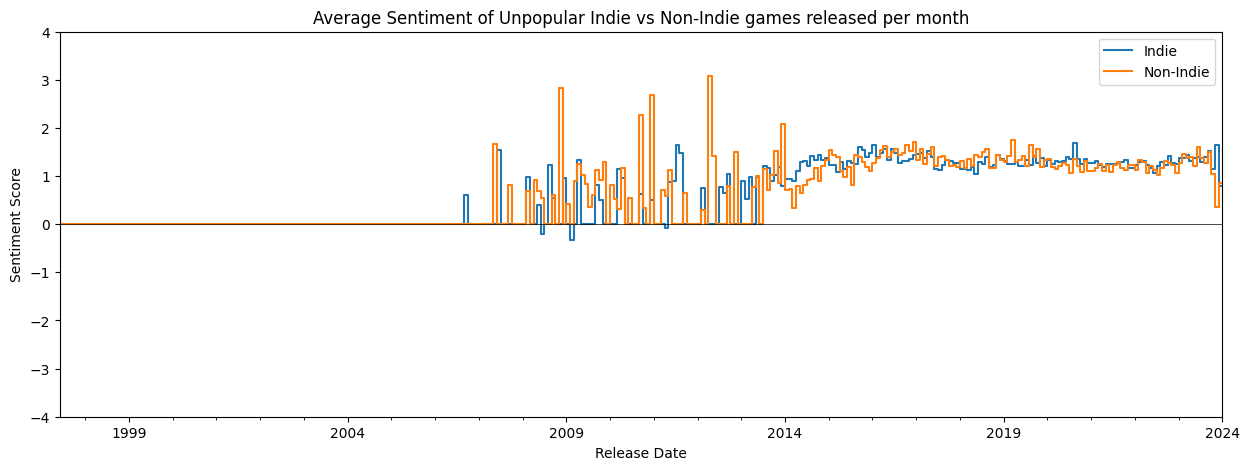

In [353]:
#| code-fold: true
#| code-summary: "Show the code"

# Calculate date range of the data
dataset_months = review_dataset.release_date.dt.to_period('M')
date_range = pd.period_range(start=dataset_months.min(), end=dataset_months.max(), freq='M')

# Get average cost of indie games released each month
indie_pop_months = review_indie_dataset.copy()
indie_pop_months = indie_pop_months[indie_pop_months['estimated_owners'].isin(["0 - 0", "0 - 20000"])]
indie_pop_months = indie_pop_months[["release_date", "sentiment", "game"]].groupby("game").mean()
indie_pop_months["release_date"] = indie_pop_months["release_date"].dt.to_period('M')
indie_sentiment = indie_pop_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# Get average cost of non-indie games released each month
nonindie_pop_months = review_nonindie_dataset.copy()
nonindie_pop_months = nonindie_pop_months[nonindie_pop_months['estimated_owners'].isin(["0 - 0", "0 - 20000"])]
nonindie_pop_months = nonindie_pop_months[["release_date", "sentiment", "game"]].groupby("game").mean()
nonindie_pop_months["release_date"] = nonindie_pop_months["release_date"].dt.to_period('M')
nonindie_sentiment = nonindie_pop_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# # Graph data
ax = indie_sentiment.plot(drawstyle="steps", kind='line', figsize=(15,5), label="Indie")
nonindie_sentiment.plot(drawstyle="steps", kind='line', ax=ax, color='C1', label="Non-Indie")
ax.set_ylim(-4, 4)
handles, labels = ax.get_legend_handles_labels()
labels = ["Indie", "Non-Indie"]
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend(handles, labels)
plt.title("Average Sentiment of Unpopular Indie vs Non-Indie games released per month")
plt.xlabel("Release Date")
plt.ylabel("Sentiment Score");

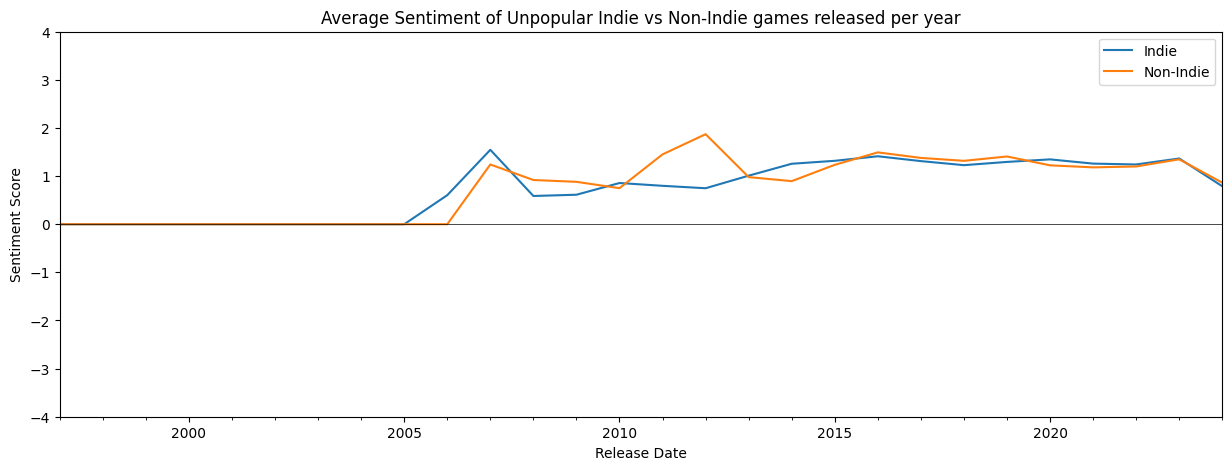

In [6]:
#| code-fold: true
#| code-summary: "Show the code"

# Calculate date range of the data
dataset_months = review_dataset.release_date.dt.to_period('Y')
date_range = pd.period_range(start=dataset_months.min(), end=dataset_months.max(), freq='Y')

# Get average cost of indie games released each month
indie_pop_months = review_indie_dataset.copy()
indie_pop_months = indie_pop_months[indie_pop_months['estimated_owners'].isin(["0 - 0", "0 - 20000"])]
indie_pop_months = indie_pop_months[["release_date", "sentiment", "game"]].groupby("game").mean()
indie_pop_months["release_date"] = indie_pop_months["release_date"].dt.to_period('Y')
indie_sentiment = indie_pop_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# Get average cost of non-indie games released each month
nonindie_pop_months = review_nonindie_dataset.copy()
nonindie_pop_months = nonindie_pop_months[nonindie_pop_months['estimated_owners'].isin(["0 - 0", "0 - 20000"])]
nonindie_pop_months = nonindie_pop_months[["release_date", "sentiment", "game"]].groupby("game").mean()
nonindie_pop_months["release_date"] = nonindie_pop_months["release_date"].dt.to_period('Y')
nonindie_sentiment = nonindie_pop_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# Graph data
ax = indie_sentiment.plot(kind='line', figsize=(15,5), label="Indie")
nonindie_sentiment.plot(kind='line', ax=ax, color='C1', label="Non-Indie")
ax.set_ylim(-4, 4)
handles, labels = ax.get_legend_handles_labels()
labels = ["Indie", "Non-Indie"]
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend(handles, labels)
plt.title("Average Sentiment of Unpopular Indie vs Non-Indie games released per year")
plt.xlabel("Release Date")
plt.ylabel("Sentiment Score");

Examining general game sentiment over time it seems that there is not only no difference between the sentiment scores of Indie vs. Triple A games, but also no major fluctuation of sentiment scores over time either. This holds true even if the data is filtered for popular games (games with >20000 owners) and unpopular games. The data shows that time and popularity have no overall impact on the sentiment scores of games. 

**Thus to answer the questions at the beginning of the project, no, sentiment toward both indie games and triple A games have not changed over time, and as a result indie games have not surpassed triple A games in player sentiment.**

Discussion on why this might be the case will be expanded upon in the discussion sections.

### Sentiment Data vs. Games Per Month vs. Cost

While time itself may not have affected sentiments, what about when its separated by costs? 

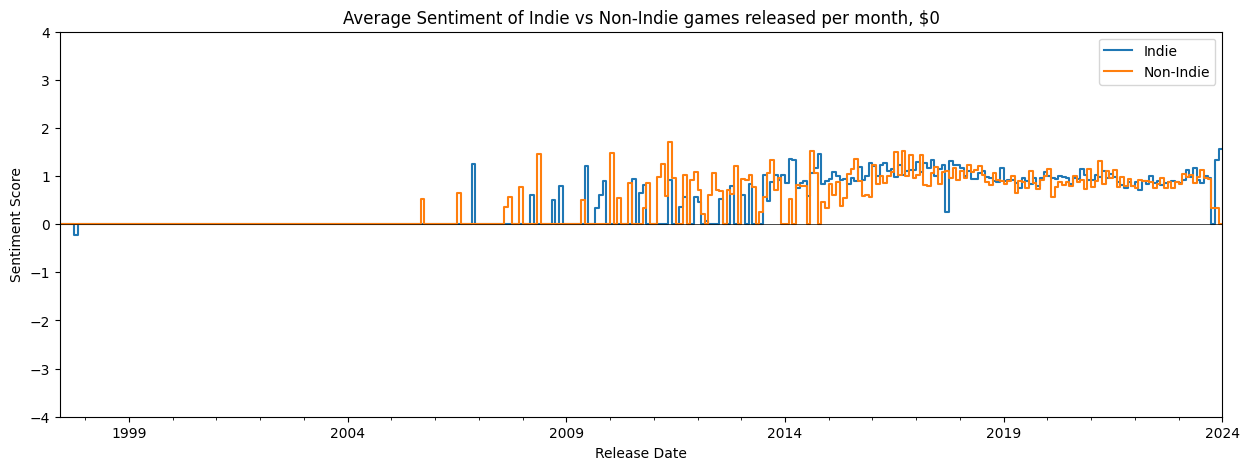

In [13]:
#| code-fold: true
#| code-summary: "Show the code"

# Calculate date range of the data
dataset_months = review_dataset.release_date.dt.to_period('M')
date_range = pd.period_range(start=dataset_months.min(), end=dataset_months.max(), freq='M')

# Get average cost of indie games released each month
indie_pop_months = review_indie_dataset.copy()
indie_pop_months = indie_pop_months[indie_pop_months['price'] == 0]
indie_pop_months = indie_pop_months[["release_date", "sentiment", "game"]].groupby("game").mean()
indie_pop_months["release_date"] = indie_pop_months["release_date"].dt.to_period('M')
indie_sentiment = indie_pop_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# Get average cost of non-indie games released each month
nonindie_pop_months = review_nonindie_dataset.copy()
nonindie_pop_months = nonindie_pop_months[nonindie_pop_months['price'] == 0]
nonindie_pop_months = nonindie_pop_months[["release_date", "sentiment", "game"]].groupby("game").mean()
nonindie_pop_months["release_date"] = nonindie_pop_months["release_date"].dt.to_period('M')
nonindie_sentiment = nonindie_pop_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# # Graph data
ax = indie_sentiment.plot(drawstyle="steps", kind='line', figsize=(15,5), label="Indie")
nonindie_sentiment.plot(drawstyle="steps", kind='line', ax=ax, color='C1', label="Non-Indie")
ax.set_ylim(-4, 4)
handles, labels = ax.get_legend_handles_labels()
labels = ["Indie", "Non-Indie"]
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend(handles, labels)
plt.title("Average Sentiment of Indie vs Non-Indie games released per month, $0")
plt.xlabel("Release Date")
plt.ylabel("Sentiment Score");

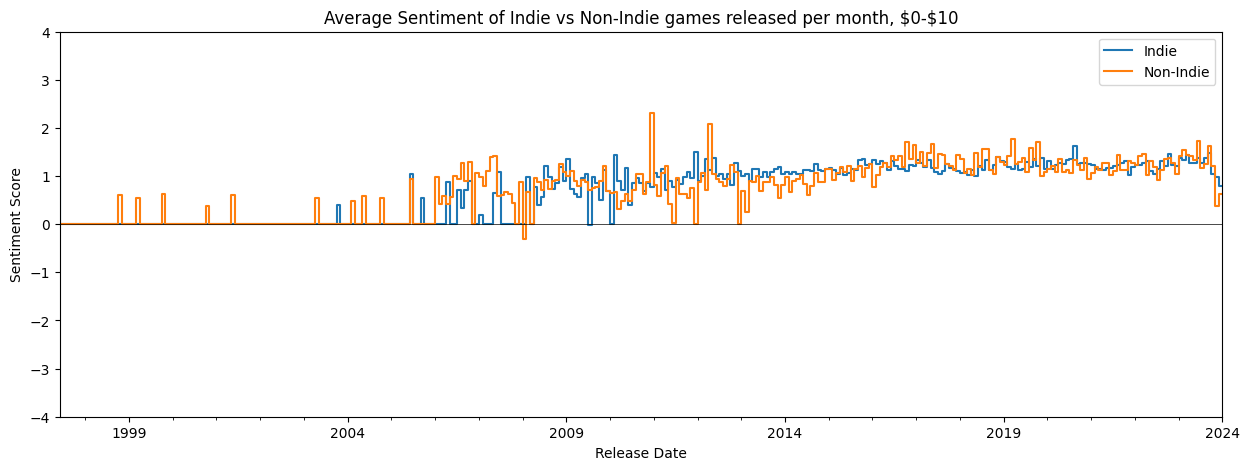

In [17]:
#| code-fold: true
#| code-summary: "Show the code"


# Calculate date range of the data
dataset_months = review_dataset.release_date.dt.to_period('M')
date_range = pd.period_range(start=dataset_months.min(), end=dataset_months.max(), freq='M')

# Get average cost of indie games released each month
indie_pop_months = review_indie_dataset.copy()
indie_pop_months = indie_pop_months[indie_pop_months['price'].between(0, 10, inclusive="right")]
indie_pop_months = indie_pop_months[["release_date", "sentiment", "game"]].groupby("game").mean()
indie_pop_months["release_date"] = indie_pop_months["release_date"].dt.to_period('M')
indie_sentiment = indie_pop_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# Get average cost of non-indie games released each month
nonindie_pop_months = review_nonindie_dataset.copy()
nonindie_pop_months = nonindie_pop_months[nonindie_pop_months['price'].between(0, 10, inclusive="right")]
nonindie_pop_months = nonindie_pop_months[["release_date", "sentiment", "game"]].groupby("game").mean()
nonindie_pop_months["release_date"] = nonindie_pop_months["release_date"].dt.to_period('M')
nonindie_sentiment = nonindie_pop_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# # Graph data
ax = indie_sentiment.plot(drawstyle="steps", kind='line', figsize=(15,5), label="Indie")
nonindie_sentiment.plot(drawstyle="steps", kind='line', ax=ax, color='C1', label="Non-Indie")
ax.set_ylim(-4, 4)
handles, labels = ax.get_legend_handles_labels()
labels = ["Indie", "Non-Indie"]
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend(handles, labels)
plt.title("Average Sentiment of Indie vs Non-Indie games released per month, \$0-\$10")
plt.xlabel("Release Date")
plt.ylabel("Sentiment Score");

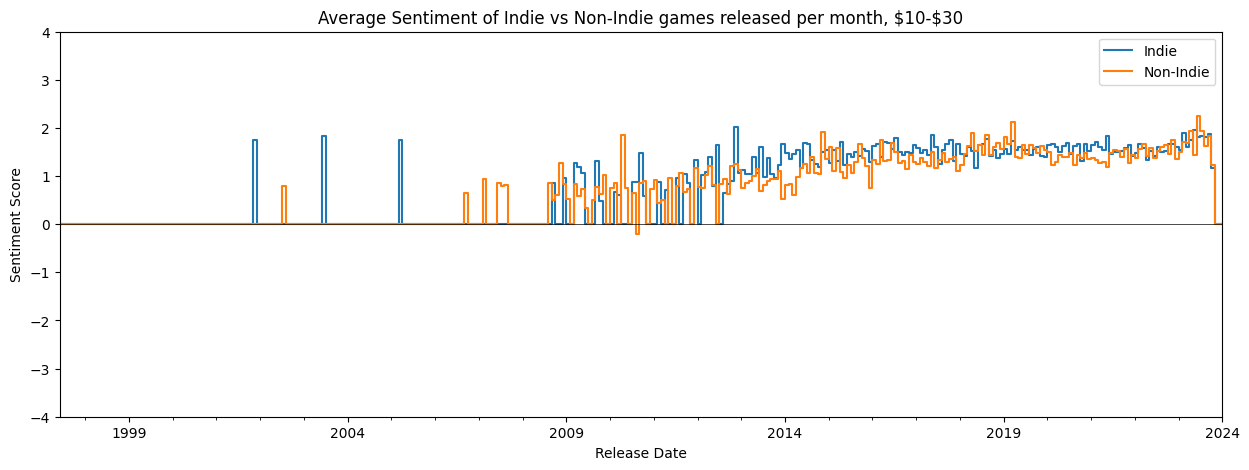

In [18]:
#| code-fold: true
#| code-summary: "Show the code"

# Calculate date range of the data
dataset_months = review_dataset.release_date.dt.to_period('M')
date_range = pd.period_range(start=dataset_months.min(), end=dataset_months.max(), freq='M')

# Get average cost of indie games released each month
indie_pop_months = review_indie_dataset.copy()
indie_pop_months = indie_pop_months[indie_pop_months['price'].between(10, 30, inclusive="right")]
indie_pop_months = indie_pop_months[["release_date", "sentiment", "game"]].groupby("game").mean()
indie_pop_months["release_date"] = indie_pop_months["release_date"].dt.to_period('M')
indie_sentiment = indie_pop_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# Get average cost of non-indie games released each month
nonindie_pop_months = review_nonindie_dataset.copy()
nonindie_pop_months = nonindie_pop_months[nonindie_pop_months['price'].between(10, 30, inclusive="right")]
nonindie_pop_months = nonindie_pop_months[["release_date", "sentiment", "game"]].groupby("game").mean()
nonindie_pop_months["release_date"] = nonindie_pop_months["release_date"].dt.to_period('M')
nonindie_sentiment = nonindie_pop_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# # Graph data
ax = indie_sentiment.plot(drawstyle="steps", kind='line', figsize=(15,5), label="Indie")
nonindie_sentiment.plot(drawstyle="steps", kind='line', ax=ax, color='C1', label="Non-Indie")
ax.set_ylim(-4, 4)
handles, labels = ax.get_legend_handles_labels()
labels = ["Indie", "Non-Indie"]
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend(handles, labels)
plt.title("Average Sentiment of Indie vs Non-Indie games released per month, \$10-\$30")
plt.xlabel("Release Date")
plt.ylabel("Sentiment Score");

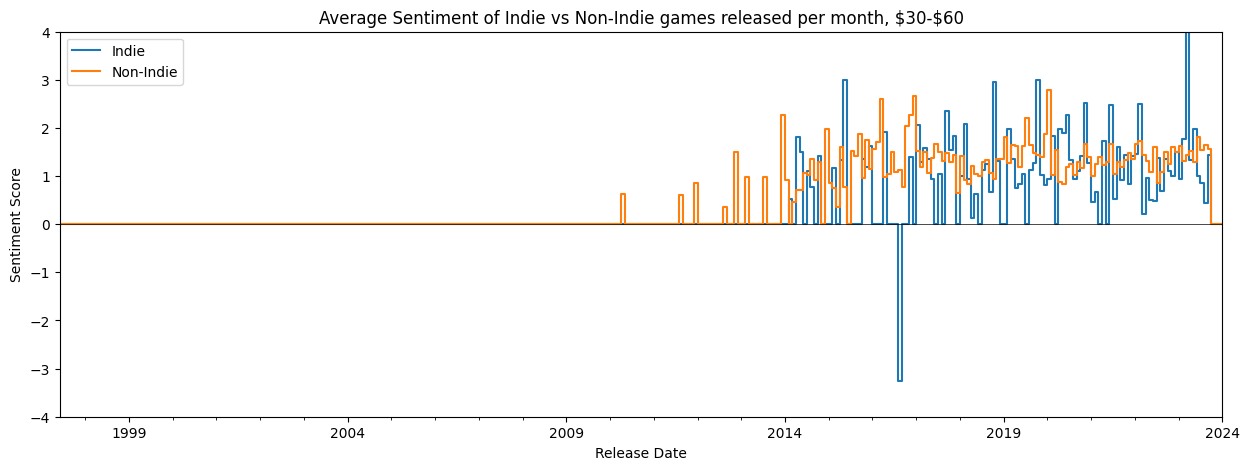

In [19]:
#| code-fold: true
#| code-summary: "Show the code"

# Calculate date range of the data
dataset_months = review_dataset.release_date.dt.to_period('M')
date_range = pd.period_range(start=dataset_months.min(), end=dataset_months.max(), freq='M')

# Get average cost of indie games released each month
indie_pop_months = review_indie_dataset.copy()
indie_pop_months = indie_pop_months[indie_pop_months['price'].between(30, 60, inclusive="right")]
indie_pop_months = indie_pop_months[["release_date", "sentiment", "game"]].groupby("game").mean()
indie_pop_months["release_date"] = indie_pop_months["release_date"].dt.to_period('M')
indie_sentiment = indie_pop_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# Get average cost of non-indie games released each month
nonindie_pop_months = review_nonindie_dataset.copy()
nonindie_pop_months = nonindie_pop_months[nonindie_pop_months['price'].between(30, 60, inclusive="right")]
nonindie_pop_months = nonindie_pop_months[["release_date", "sentiment", "game"]].groupby("game").mean()
nonindie_pop_months["release_date"] = nonindie_pop_months["release_date"].dt.to_period('M')
nonindie_sentiment = nonindie_pop_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# # Graph data
ax = indie_sentiment.plot(drawstyle="steps", kind='line', figsize=(15,5), label="Indie")
nonindie_sentiment.plot(drawstyle="steps", kind='line', ax=ax, color='C1', label="Non-Indie")
ax.set_ylim(-4, 4)
handles, labels = ax.get_legend_handles_labels()
labels = ["Indie", "Non-Indie"]
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend(handles, labels)
plt.title("Average Sentiment of Indie vs Non-Indie games released per month, \$30-\$60")
plt.xlabel("Release Date")
plt.ylabel("Sentiment Score");

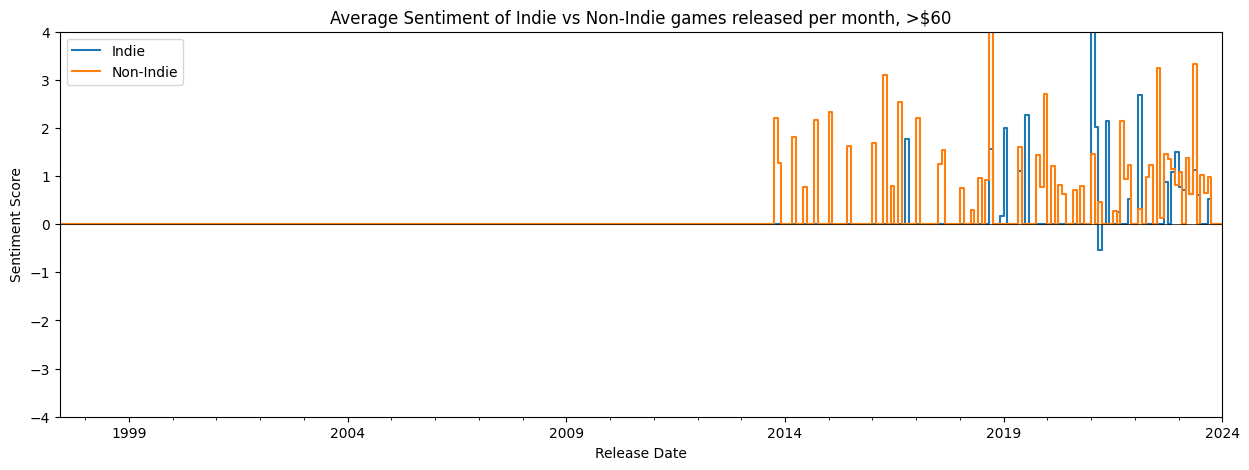

In [21]:
#| code-fold: true
#| code-summary: "Show the code"

# Calculate date range of the data
dataset_months = review_dataset.release_date.dt.to_period('M')
date_range = pd.period_range(start=dataset_months.min(), end=dataset_months.max(), freq='M')

# Get average cost of indie games released each month
indie_pop_months = review_indie_dataset.copy()
indie_pop_months = indie_pop_months[indie_pop_months['price'] > 60]
indie_pop_months = indie_pop_months[["release_date", "sentiment", "game"]].groupby("game").mean()
indie_pop_months["release_date"] = indie_pop_months["release_date"].dt.to_period('M')
indie_sentiment = indie_pop_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# Get average cost of non-indie games released each month
nonindie_pop_months = review_nonindie_dataset.copy()
nonindie_pop_months = nonindie_pop_months[nonindie_pop_months['price'] > 60]
nonindie_pop_months = nonindie_pop_months[["release_date", "sentiment", "game"]].groupby("game").mean()
nonindie_pop_months["release_date"] = nonindie_pop_months["release_date"].dt.to_period('M')
nonindie_sentiment = nonindie_pop_months[["release_date", "sentiment"]].groupby("release_date").mean().reindex(date_range, fill_value=0).sort_index()

# # Graph data
ax = indie_sentiment.plot(drawstyle="steps", kind='line', figsize=(15,5), label="Indie")
nonindie_sentiment.plot(drawstyle="steps", kind='line', ax=ax, color='C1', label="Non-Indie")
ax.set_ylim(-4, 4)
handles, labels = ax.get_legend_handles_labels()
labels = ["Indie", "Non-Indie"]
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend(handles, labels)
plt.title("Average Sentiment of Indie vs Non-Indie games released per month, >$60")
plt.xlabel("Release Date")
plt.ylabel("Sentiment Score");

The data again reveals that there isn't a major difference between player sentiment when comparing Indie vs Non-Indie games, nor has sentiment changed over time. One interesting aspect to note however is the fact that around the \\$30 to \\$60 range is when sentiment over games starts to become highly variable, with indie games having a much higher sentiment variability than Non-Indie games do. There are various reasons that this could be the case, which will be discussed in the discussion section.

## Discussion

As shown by the sentiment analysis graphs, sentiment toward both indie games and triple-A games do not differ arguably at all. No matter how you slice it, the data always reveals that games of both categories have the same average sentiment, whether you look at high cost games, low cost games, popular or not. It is strong evidence that despite how much emphasis is put on the divide between "Indie" vs "Triple-A" games, when it comes down to it the distinction is not an important contributing factor to average player sentiment. There could be multiple reasons why this could be the case. 

One theory is that people genuinely do not care about whether the game is indie or not, for other factors influence their sentiment to a greater degree than how many people made the game they're playing. Such a theory would make sense, why would a good game be any better if one person made it versus 100 people? Would a bad game be alright if a single person made it? Players will inevitably focus more on the gameplay, art, music, etc. of a game, thus knowing it was made by a large or small team won't override their perception of the game.

Another theory is that the opposing views may just cancel each other out. It is undeniable that some people are willing to cut indie games more slack when it comes to bugs and quality issues as they are aware that the lack of resources will inherently lead to more mistakes slipping through the cracks. On the side of the argument, there are also players out there that view indie games as inherently lesser than anything triple A can create. Indie developers simply won't have the resources, so it'll inherently lack the high fidelity graphics and realism that some communities believe is a must have. Theses opposing view may cancel each other out, leading to a middling sentiment when reviews are considered as a whole.
A piece of evidence that backs this viewpoint up is the 30 dollar to 60 dollar sentiment graph. Its not surprising to learn that the most expensive something is, the stronger opinions people will have about it to either justify their purchase or express anger over being ripped off. What is interesting is how much more variability indie games have compared the their triple-A counterparts. Typically the 30 dollar to 60 dollar range is where most gamers will deem a game to be asking for a premium price, not overly expensive but also pricey enough where they expect a certain degree of quality. Its a mindset carried over from the pricing structure of console games, who have a fixed $60 price tag (as of now) for all first-party games. Thus, going with the opposing views theory, the higher variability may indicate the point where the excuse "well its just an indie game" for mediocre no longer holds due to the high asking price. Thus, it divides indie games into two camps, games that are deemed worthy of price and games that are absolutely not. Confirmation bias then kicks in when reviewers consider the fact that the game is an indie game, i.e. "This game is so good, and its made by one person. Of course its worth purchasing" or "This game is terrible, its made by a single greedy dev who wants to steal your money." 

The overall takeaway from this project though is that despite countless buzzwords about indie vs triple A in the gaming community, there really isn't any general statement to be made about the quality of "indie games as a whole" or "triple A games as a whole". The games within each category vary too significantly to make a blanket statement the category as a whole. Thus going forward, its best to be cautious of any source that claims anything about either category as a whole, as what they say may sat more about them than the games they're talking about.